# Logistic Regression on Titanic Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
titanic_data = pd.read_csv("train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.index

RangeIndex(start=0, stop=891, step=1)

## Analyzing Data

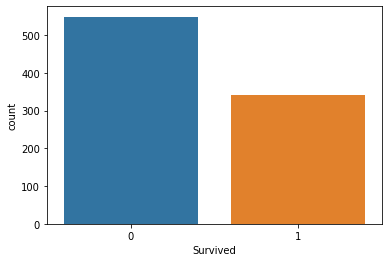

In [4]:
sns.countplot(x="Survived", data=titanic_data)

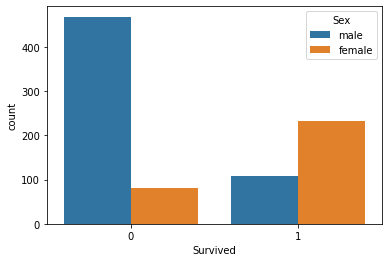

In [5]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

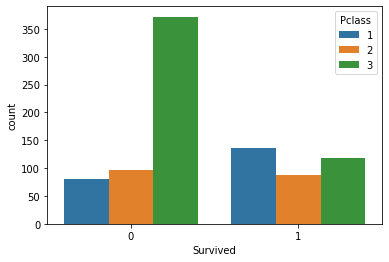

In [6]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

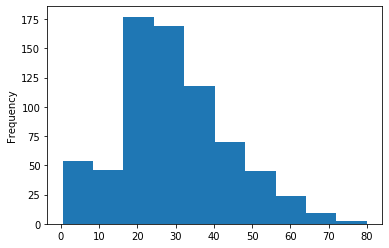

In [7]:
titanic_data["Age"].plot.hist()

In [8]:
#more young passengers

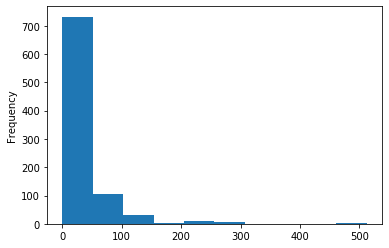

In [10]:
titanic_data["Fare"].plot.hist()

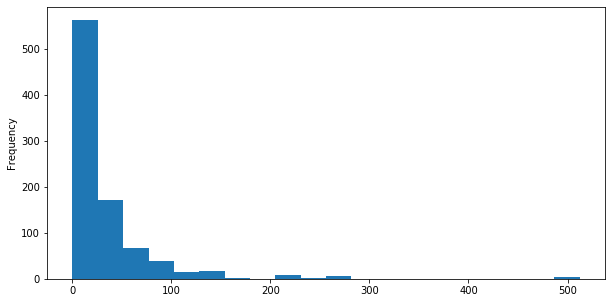

In [12]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))

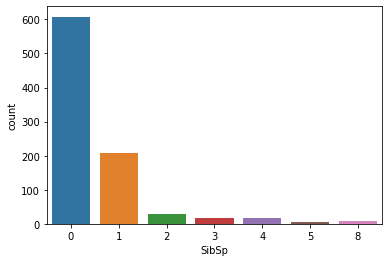

In [13]:
sns.countplot(x="SibSp", data=titanic_data)

## Data Wrangling

In [14]:
#checks for null values
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
#check number of nulls in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

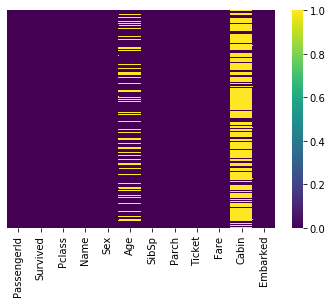

In [18]:
#heatmap to visualize nulls
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

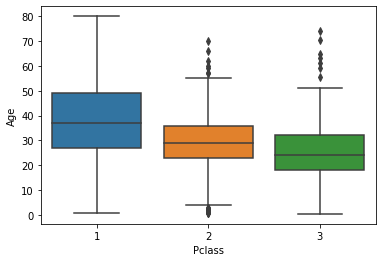

In [19]:
#boxplot to analyze age
sns.boxplot(x="Pclass", y="Age", data=titanic_data)

In [20]:
#dropping columns
titanic_data.drop("Cabin", axis=1, inplace=True)

In [21]:
titanic_data.dropna(inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


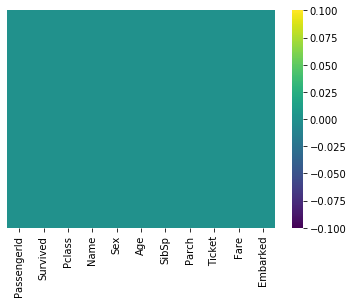

In [22]:
#verifying there are no null values 
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

In [23]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [26]:
#dealing with categorical variables
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True) #drop_first drops first instance so we only have male left
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [28]:
embarked = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
Pcl = pd.get_dummies(titanic_data['Pclass'],drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [30]:
#concatinating the dataframes
titanic_data = pd.concat([titanic_data,sex,embarked,Pcl],axis=1)

In [31]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [33]:
#dropping unnecessary columns
titanic_data.drop(['Sex','Embarked','Pclass','PassengerId','Name','Ticket'],axis=1, inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train and Test

### Train

In [37]:
X=titanic_data.drop('Survived',axis=1) #all other columns except survived
y=titanic_data['Survived']

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()

In [41]:
logmodel.fit(X_train,y_train)

C:\Users\CHIDERA ANI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
pred = logmodel.predict(X_test)

In [43]:
#checking accuracy
from sklearn.metrics import classification_report

In [44]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.81      0.81       126\n           1       0.72      0.72      0.72        88\n\n    accuracy                           0.77       214\n   macro avg       0.76      0.76      0.76       214\nweighted avg       0.77      0.77      0.77       214\n'

In [45]:
#checking accuracy using confusion matrix
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test,pred)

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,pred)

0.7710280373831776

# SUV Data Predictions

In [58]:
df = pd.read_csv("suv_data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [59]:
X = df.iloc[:,[2,3]].values #age and salary
y = df.iloc[:,[4]].values #purchased

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [62]:
#scaling input values for better performance
from sklearn.preprocessing import StandardScaler

In [63]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
from sklearn.linear_model import LogisticRegression

In [67]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\CHIDERA ANI\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred = classifier.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test ,y_pred)*100

89.0

# K Nearest Neighbor

In [3]:
df = pd.read_csv('iris_data.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
X[0:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = df['species']
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [7]:
from sklearn import preprocessing

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (100, 4) (100,)
Test set: (50, 4) (50,)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
k = 3
#training the model 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [13]:
#predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [15]:
y_test[0:5]

128    Iris-virginica
18        Iris-setosa
130    Iris-virginica
105    Iris-virginica
107    Iris-virginica
Name: species, dtype: object

In [16]:
#accuracy classification score
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.95
Test set Accuracy:  0.96


In [17]:
#determining the best k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.94, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96])

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.96 with k= 2


# Naive Bayes
Gaussian

In [19]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 

In [23]:
dataset = datasets.load_iris()

In [20]:
df = pd.read_csv('iris_data.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
model = GaussianNB()
model.fit(dataset.data, dataset.target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [26]:
expected = dataset.target
predicted = model.predict(dataset.data)

In [27]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


Using the dataset to solve the problem

In [28]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']

In [29]:
model2 = GaussianNB()
model2.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
print(model2)

GaussianNB(priors=None, var_smoothing=1e-09)


In [32]:
expected = y
predicted = model2.predict(X)

In [33]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.94      0.94        50
 Iris-virginica       0.94      0.94      0.94        50

       accuracy                           0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


# Linear Regression

To find linear relationship between head size and brain weight

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
data = pd.read_csv('headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
data.shape

(237, 4)

In [5]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
#cannot use rank 1 matrix in sickit learn
m = len(X)
X = X.reshape((m,1))
#model
reg = LinearRegression()
#fit training data
reg = reg.fit(X,Y)
# predict Y
Y_pred = reg.predict(X)

In [9]:
 # R2 score
r2_score = reg.score(X,Y)
print(r2_score)

0.639311719957


In [10]:
# splitting to test and train data
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [28]:
reg2 = LinearRegression()

In [29]:
reg2 = reg2.fit(X_train, y_train)

In [30]:
Y_predict = reg2.predict(X_test)

In [31]:
r2_score2 = reg2.score(X_test,y_test)
r2_score2

0.5571552826824453

In [32]:
r2_score2 = reg2.score(X_train,y_train)
r2_score2

0.65944320736707

In [33]:
print(reg2.coef_)
print(reg2.intercept_)

[0.27016486]
302.320244616889


Text(0, 0.5, 'Brain Weight')

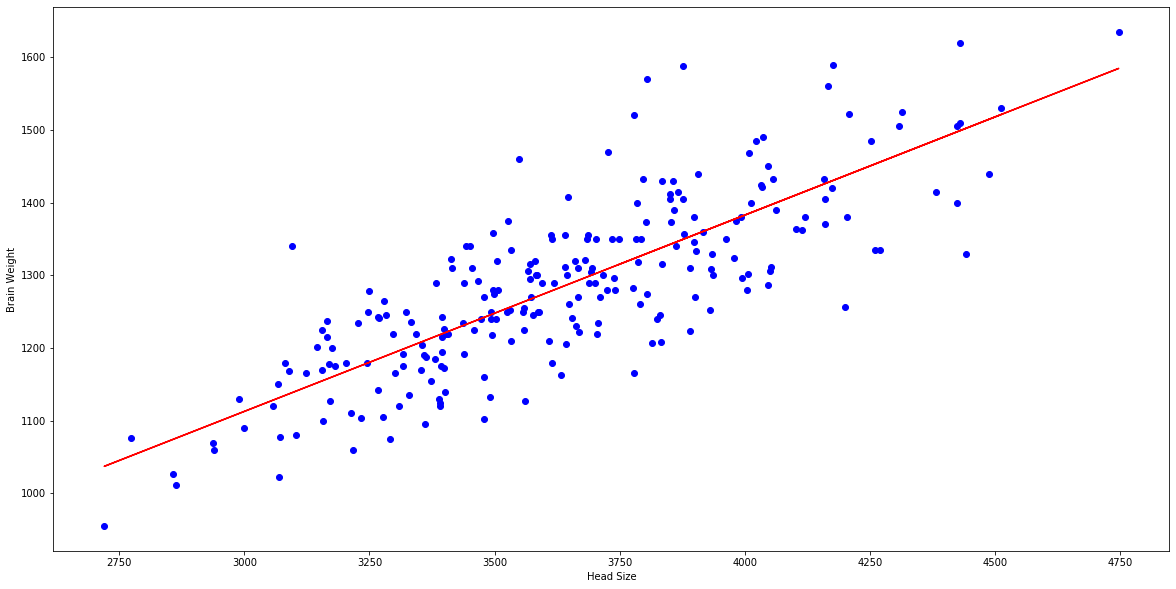

In [24]:
plt.scatter(data['Head Size(cm^3)'], data['Brain Weight(grams)'],  color='blue')
plt.plot(X_train, reg2.coef_[0]*X_train + reg2.intercept_, '-r')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")